<a href="https://www.kaggle.com/code/franciscangeno/anomaly-detection?scriptVersionId=113787795" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.io import loadmat
from sklearn.model_selection import train_test_split
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/anomaly-detection-algorithm/ex8data1.mat


In [2]:
df = loadmat("/kaggle/input/anomaly-detection-algorithm/ex8data1.mat")

In [3]:
# access the X element from the dictionary
df = df["X"]

In [4]:
# convert the array to a pandas dataframe
df=pd.DataFrame(df)

In [5]:
df

,0,1
0,13.046815,14.741152
1,13.408520,13.763270
2,14.195915,15.853181
3,14.914701,16.174260
4,13.576700,14.042849
...,...,...
302,12.476629,14.459370
303,19.582573,10.411619
304,23.339868,16.298874
305,18.261188,17.978309


In [6]:
df.describe()

,0,1
count,307.000000,307.000000
mean,14.112226,14.997711
std,1.355957,1.309707
min,4.752613,4.126232
25%,13.403351,14.361997
50%,14.059507,15.023113
75%,14.675503,15.654394
max,23.339868,24.350407


In [7]:
def feature_normalize(df):
    mu = np.mean(df,axis=0)
    sigma = np.std(df,axis=0)
    return (df - mu)/sigma

def estimateGaussian(df):
    mu = np.mean(df, axis=0)
    sigma = np.cov(df.T)
    return mu, sigma

def multivariateGaussian(df,mu,sigma):
    p = multivariate_normal(mean=mu, cov=sigma)
    return p.pdf(dataset)

In [8]:
def selectThresholdByCV(probs,gt):
    best_epsilon = 0
    best_f1 = 0
    f = 0
    stepsize = (max(probs) - min(probs)) / 1000;
    epsilons = np.arange(min(probs),max(probs),stepsize)
    for epsilon in np.nditer(epsilons):
        predictions = (probs < epsilon)
        f = f1_score(gt, predictions, average = "binary")
        if f > best_f1:
            best_f1 = f
            best_epsilon = epsilon
    return best_f1, best_epsilon

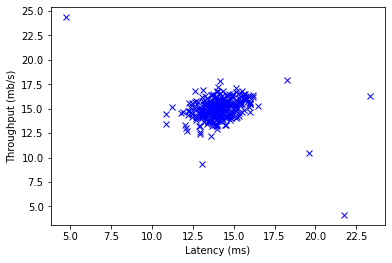

In [9]:
n_training_samples = df.shape[0]
n_dim = df.shape[1]

plt.figure()
plt.xlabel("Latency (ms)")
plt.ylabel("Throughput (mb/s)")
plt.plot(df.iloc[:,0],df.iloc[:,1],"bx")
plt.show()